In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from seaborn import kdeplot
import matplotlib.pyplot as plt
from utils import *
from pandas.api.types import CategoricalDtype
%load_ext autoreload

%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [81]:
df = loadData()
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,327,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,328,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,337,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,338,4.34,4.35,2.75


In [82]:
qqdf,ppc = qualtoquan(df)
qqdf.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,2,61.5,55.0,330,3.95,3.98,2.43
1,0.21,4,6,3,59.8,61.0,327,3.89,3.84,2.31
2,0.23,2,6,5,56.9,65.0,328,4.05,4.07,2.31
3,0.29,4,2,4,62.4,58.0,337,4.20,4.23,2.63
4,0.31,2,1,2,63.3,58.0,338,4.34,4.35,2.75


/var/folders/v4/c1my1gp5181d0r1qfbxm68580000gn/T/ipykernel_54545/217912991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrHeatmap = sns.heatmap(qqdf.corr(),vmin=-1,vmax=1,center=0,annot=True)


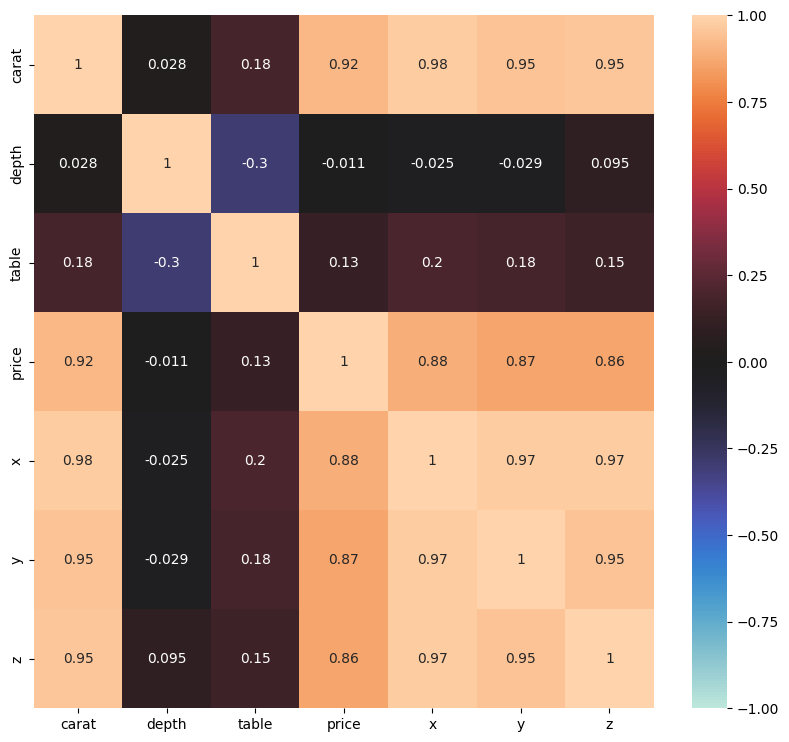

In [83]:
plt.figure(figsize=(10,9))
corrHeatmap = sns.heatmap(qqdf.corr(),vmin=-1,vmax=1,center=0,annot=True)

In [84]:
qqdf.corr()['price'].to_csv("../Figures/Question-1/price_corr_table.csv")
print(qqdf.corr()['price'])

carat    0.921591
depth   -0.010648
table    0.127134
price    1.000000
x        0.884436
y        0.865422
z        0.861250
Name: price, dtype: float64


/var/folders/v4/c1my1gp5181d0r1qfbxm68580000gn/T/ipykernel_54545/883247020.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  qqdf.corr()['price'].to_csv("../Figures/Question-1/price_corr_table.csv")
/var/folders/v4/c1my1gp5181d0r1qfbxm68580000gn/T/ipykernel_54545/883247020.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(qqdf.corr()['price'])


In [85]:
ppc.corr()['ppc'].to_csv("../Figures/Question-1/ppc_corr_table.csv")
print(ppc.corr()['ppc'])

ppc      1.000000
carat    0.769457
depth   -0.035724
table    0.084585
price    0.912302
x        0.787346
y        0.771730
z        0.765542
Name: ppc, dtype: float64


/var/folders/v4/c1my1gp5181d0r1qfbxm68580000gn/T/ipykernel_54545/1221923948.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ppc.corr()['ppc'].to_csv("../Figures/Question-1/ppc_corr_table.csv")
/var/folders/v4/c1my1gp5181d0r1qfbxm68580000gn/T/ipykernel_54545/1221923948.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(ppc.corr()['ppc'])


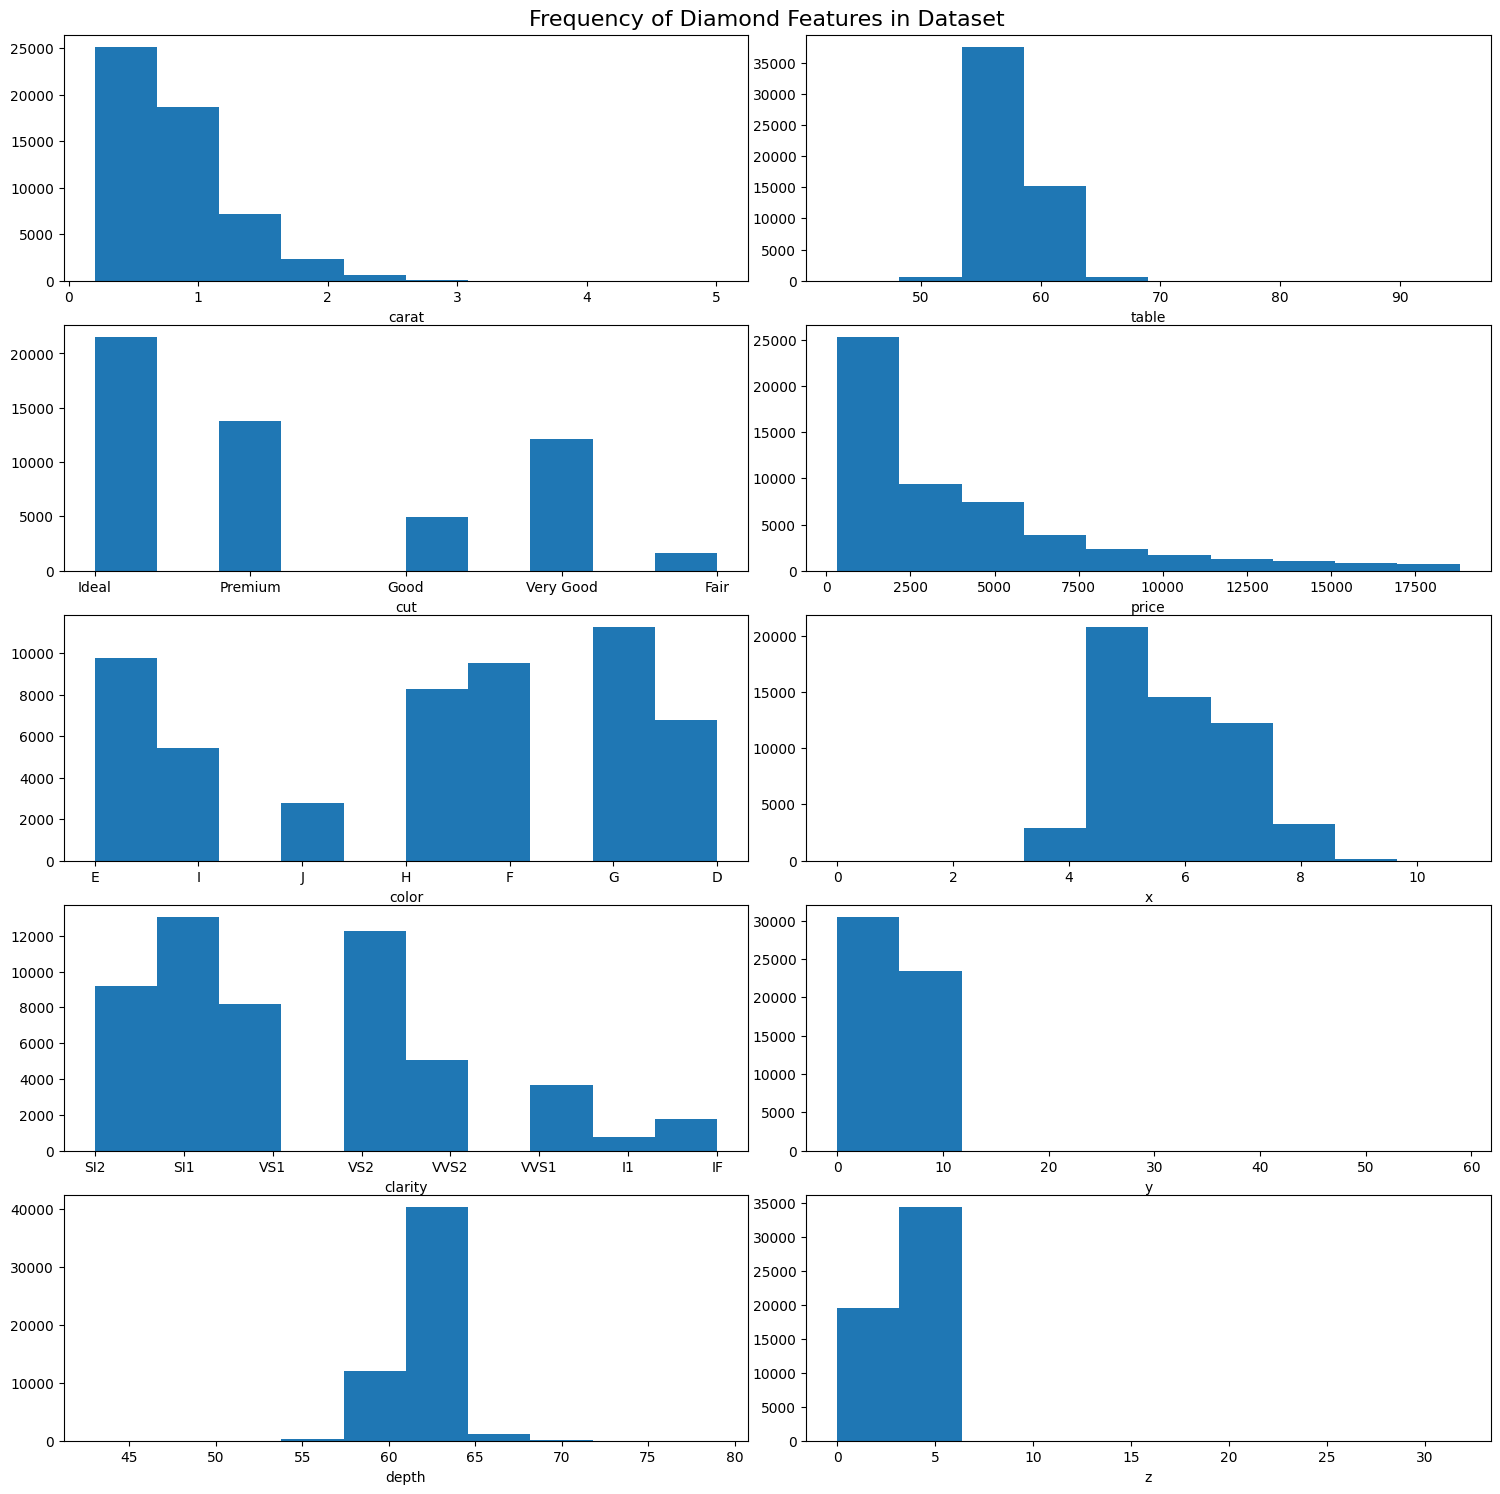

In [86]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset",fontsize=16)
fig.tight_layout()
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    axs[i-numRows*j,j].hist(df[x])
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1

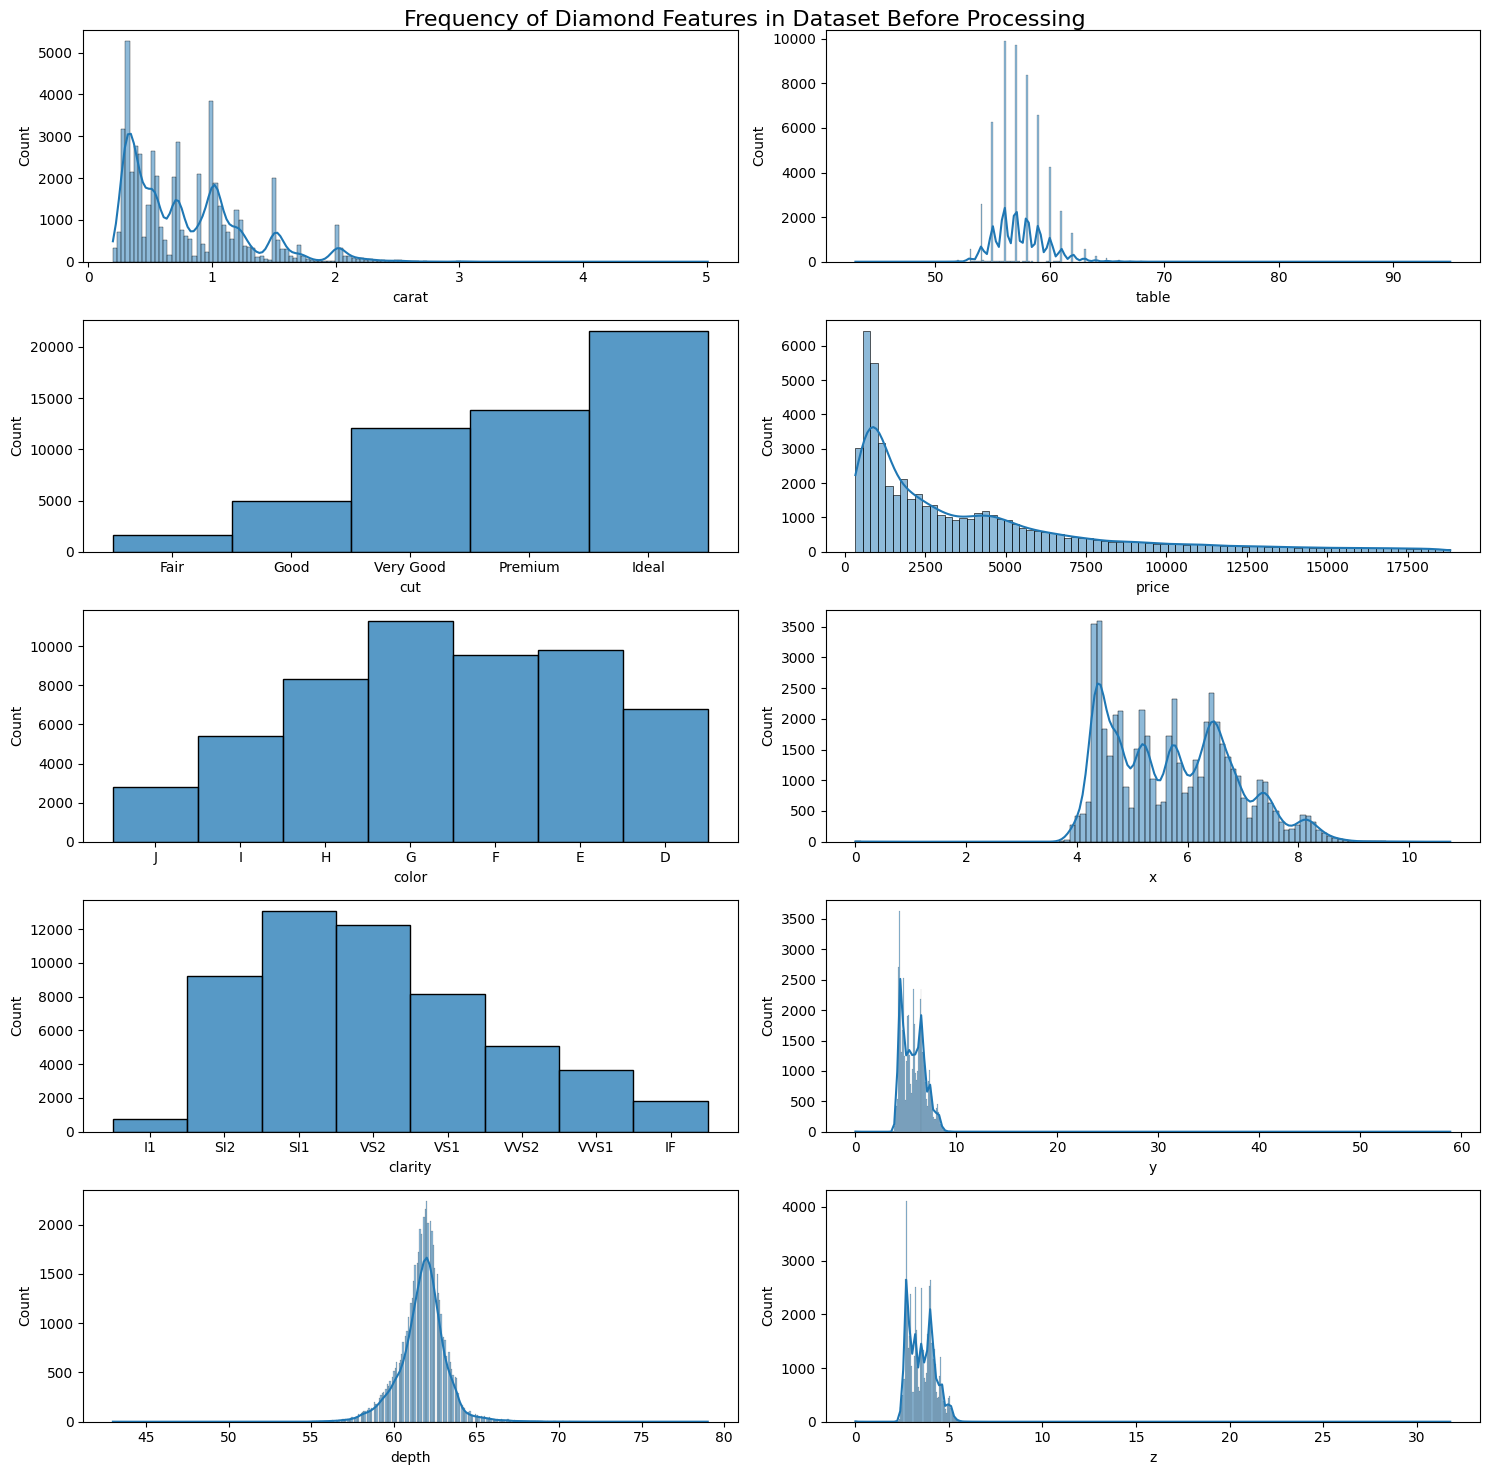

In [87]:
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset Before Processing",fontsize=16)
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    
    sns.histplot(data= df[x], ax=axs[i-numRows*j,j], \
                 kde= not pd.api.types.is_categorical_dtype(df[x]), \
                    )
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1
fig.tight_layout()
    

carat: 0.020450070764268666: boxcox
table: 0.0: boxcox
price: 0.025876138778519013: boxcox
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


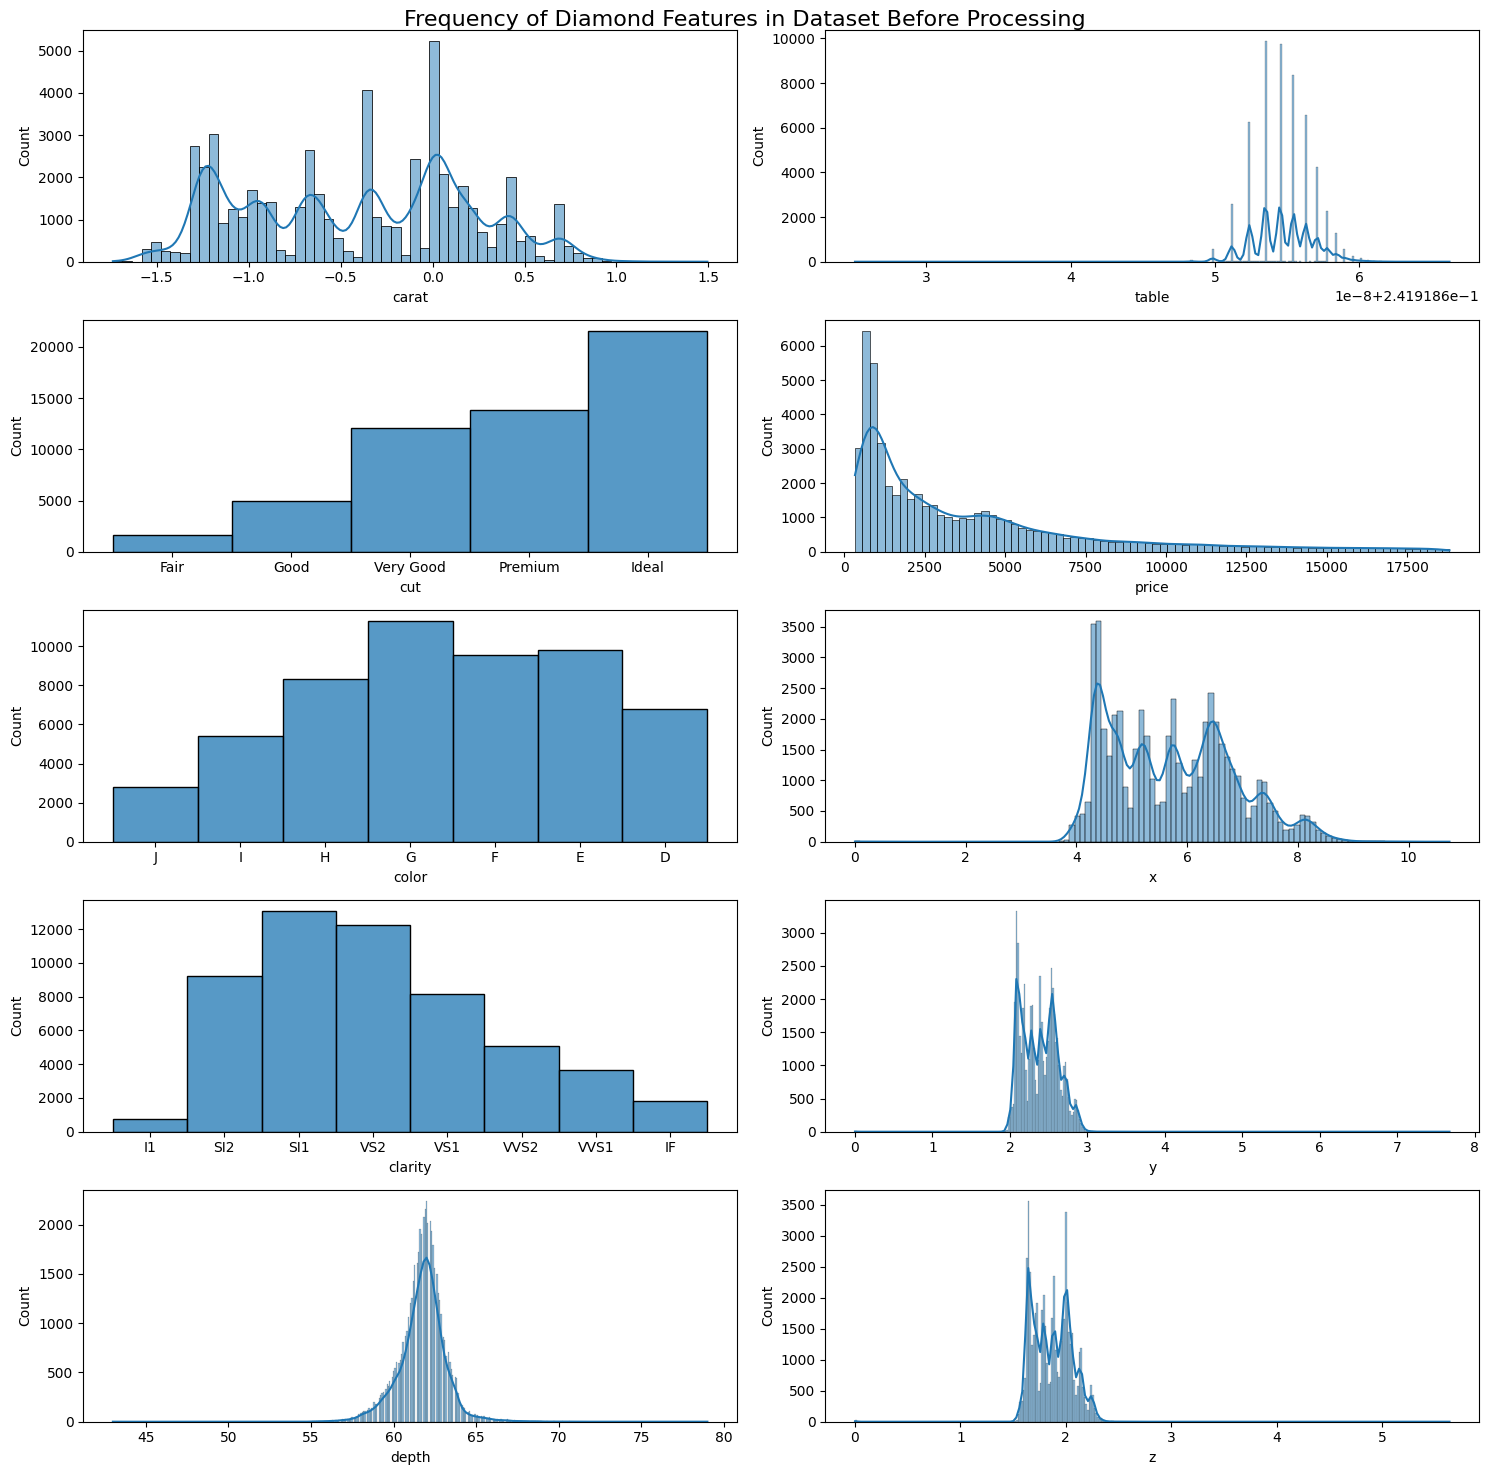

In [88]:
df = deSkew(df)
numRows = len(df.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset Before Processing",fontsize=16)
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    
    sns.histplot(data= df[x], ax=axs[i-numRows*j,j], \
                 kde= not pd.api.types.is_categorical_dtype(df[x]), \
                    )
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1
fig.tight_layout()
    

<Axes: title={'center': 'price'}, xlabel='cut'>

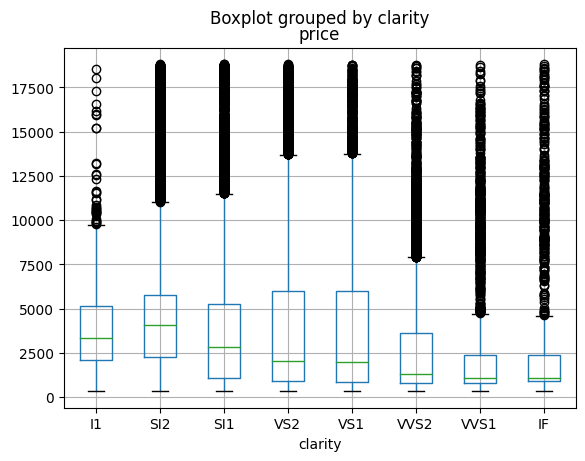

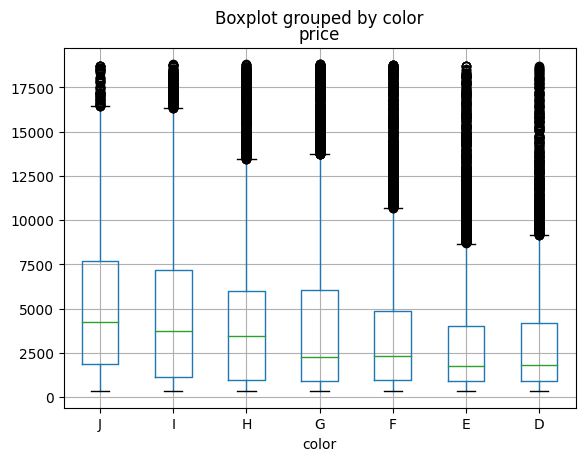

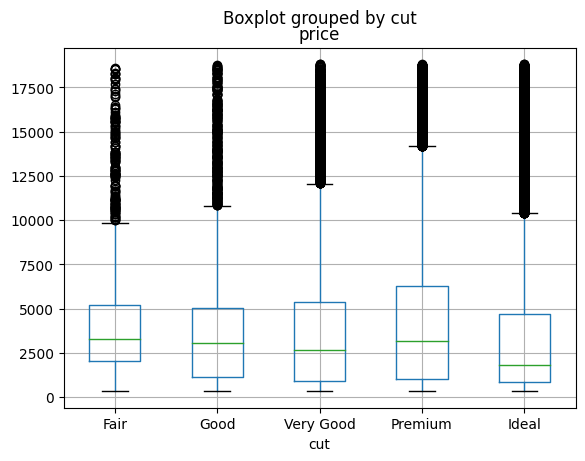

In [89]:
df.boxplot(column='price',by='clarity')
df.boxplot(column='price',by='color')
df.boxplot(column='price',by='cut')

In [90]:
for x in qqdf.columns:
    print(f"{x}: {qqdf[x].skew()}")


carat: 1.116645920812613


TypeError: 'Categorical' with dtype category does not support reduction 'skew'

In [ ]:
from scipy import stats

In [ ]:
qqdf = loadData()

(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 3.000e+00, 0.000e+00, 9.000e+00, 1.000e+00, 5.600e+01,
        3.000e+00, 5.830e+02, 1.190e+02, 2.697e+03, 1.000e+02, 6.342e+03,
        9.000e+01, 9.960e+03, 9.764e+03, 4.500e+01, 8.405e+03, 3.200e+01,
        6.594e+03, 2.400e+01, 4.273e+03, 3.300e+01, 2.306e+03, 2.000e+01,
        1.286e+03, 9.000e+00, 5.900e+02, 3.000e+00, 2.620e+02, 0.000e+00,
        1.460e+02, 1.000e+00, 9.100e+01, 0.000e+00, 4.200e+01, 0.000e+00,
        2.100e+01, 0.000e+00, 9.000e+00, 9.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

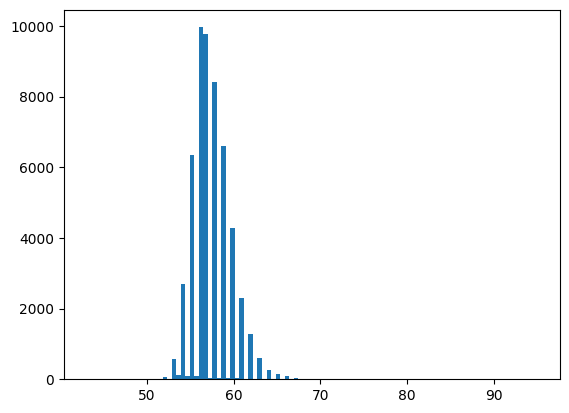

In [ ]:
plt.hist(qqdf[['table']], bins=100)

(array([1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        3.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 9.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 5.600e+01, 0.000e+00, 1.000e+00, 2.000e+00,
        5.750e+02, 3.200e+01, 6.700e+01, 2.652e+03, 9.700e+01, 6.000e+01,
        6.332e+03, 3.900e+01, 7.700e+01, 9.929e+03, 5.300e+01, 9.764e+03,
        3.200e+01, 8.407e+03, 2.100e+01, 6.589e+03, 2.900e+01, 4.273e+03,
        4.200e+01, 2.305e+03, 2.000e+0

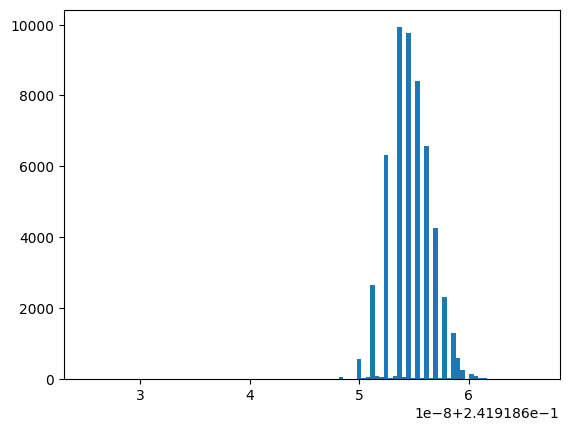

In [ ]:
plt.hist(boxcoxtable,bins=100)

In [ ]:
qqdf['table'].skew()

0.7968958486695427

In [ ]:
boxcoxtable = pd.Series(stats.boxcox(qqdf['table'])[0])

In [ ]:
boxcoxtable.skew()

0.0

In [ ]:
qqdf['table']

0        55.0
1        61.0
2        65.0
3        58.0
4        58.0
         ... 
53935    57.0
53936    55.0
53937    60.0
53938    58.0
53939    55.0
Name: table, Length: 53940, dtype: float64

In [ ]:
processedDF = deSkew(qqdf)

carat: 0.020450070764268666: boxcox
table: 0.0: boxcox
price: 0.025876138778519013: boxcox
y: 0.3636482008742052: Sqrt
z: 0.0139742634447758: Sqrt


/Users/ineshchakrabarti/opt/miniconda3/envs/diamondProj/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


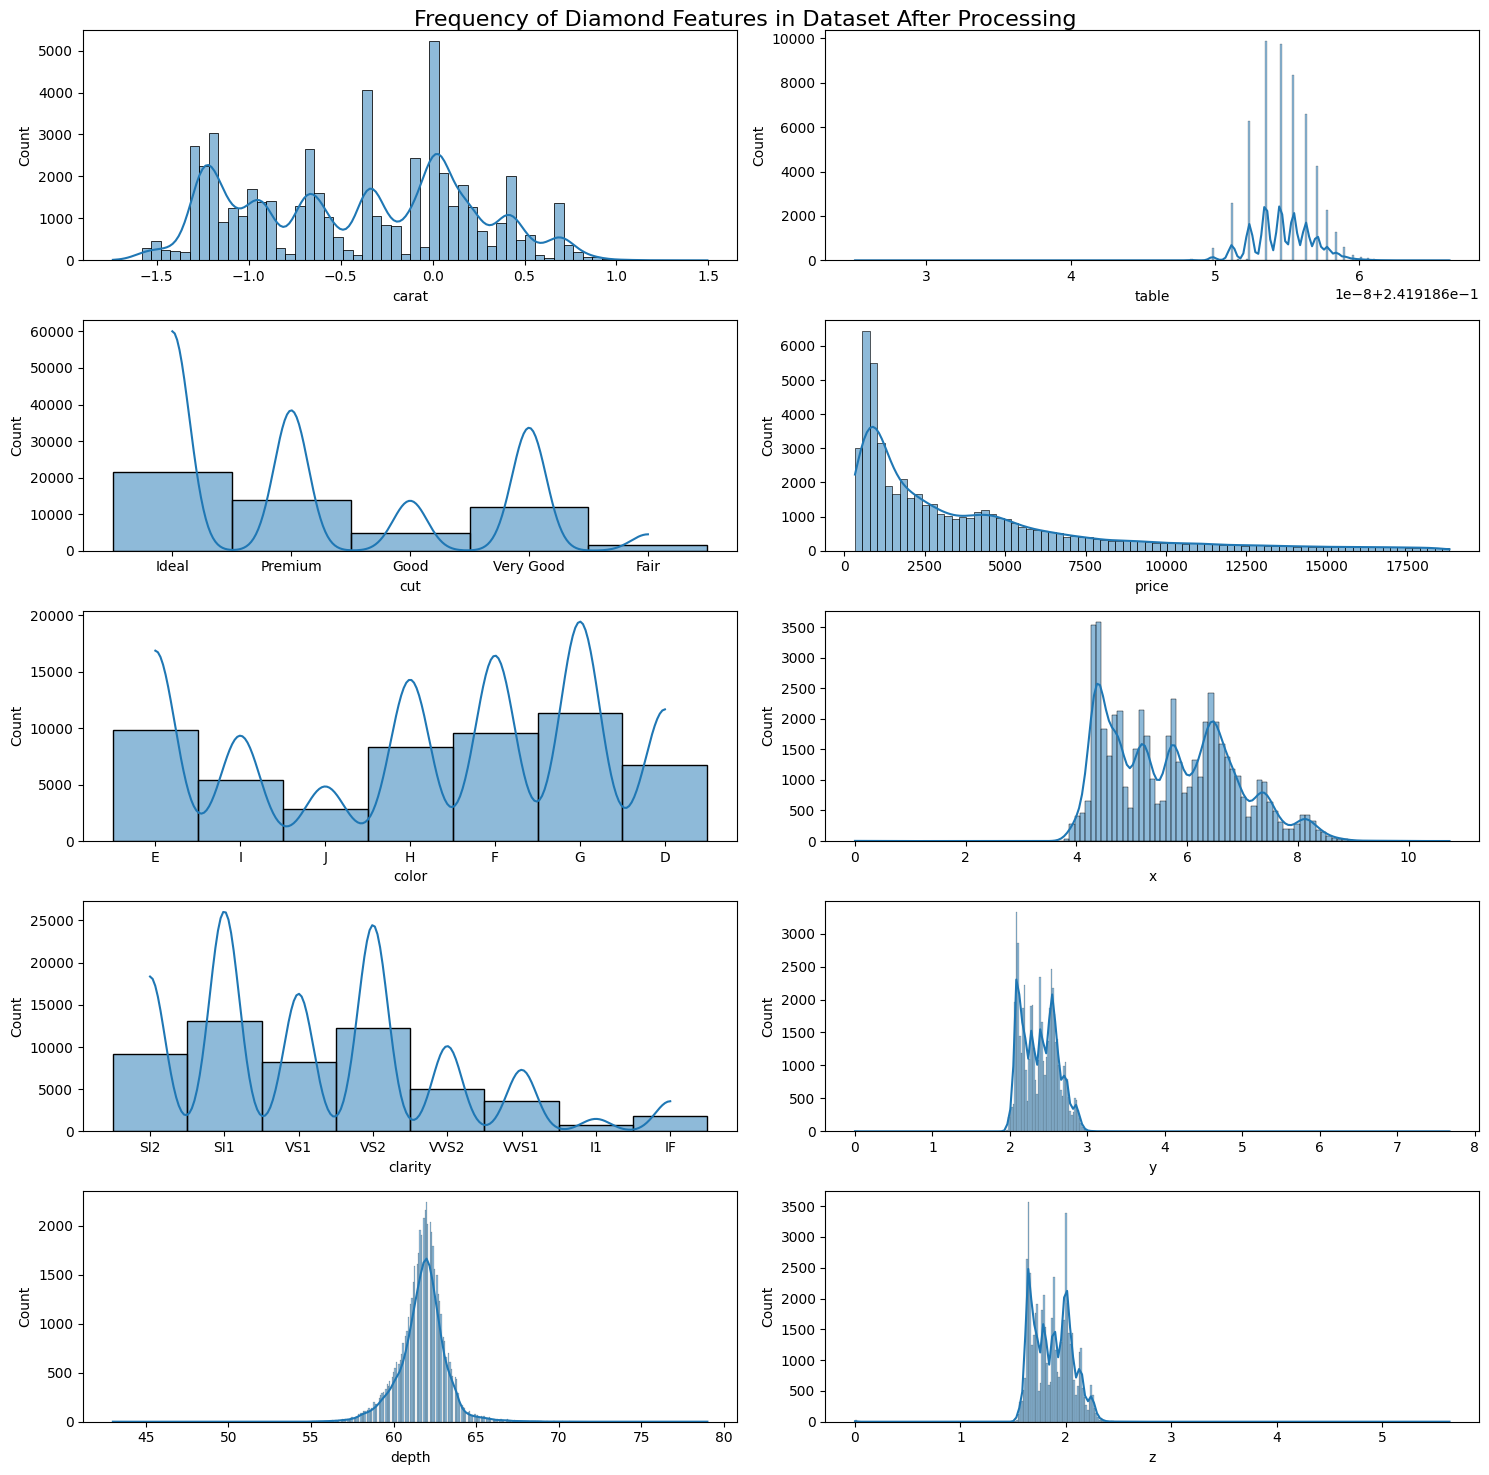

In [ ]:
numRows = len(processedDF.columns)//2
fig, axs = plt.subplots(numRows, 2)
fig.set_figheight(15)
fig.set_figwidth(15)
fig.suptitle("Frequency of Diamond Features in Dataset After Processing",fontsize=16)
i=0
j=0
for x in df.columns:
    if i == numRows:
        j=1
    sns.histplot(data= processedDF[x], ax=axs[i-numRows*j,j], \
                 kde= not pd.api.types.is_categorical_dtype(processedDF[x]), \
                    )
    axs[i-numRows*j,j].set_xlabel(x)
    i+=1
fig.tight_layout()
    